In [ ]:
# External, general
from __future__ import division
import os, sys, pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# External, specific
import pandas as pd
import ipywidgets as widgets
from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.manifold.t_sne import TSNE
import networkx as nx
import scipy.stats as stats

**Centroid opens the file with x, y and z coordinates for the cells, fspace_TFOR_pca opnes the excel sheet with the parameter to be colour mapped**

In [ ]:
centroid = (r"/content/other_measurements.tsv")
#fspace_CFOR_pca = (r"/content/shape_CFOR_pca_measured.tsv")
fspace_TFOR_pca = (r"/content/shape_TFOR_pca_measured.tsv")

In [ ]:
df_centroid = pd.read_csv(centroid, delimiter='\t')
df_fspace_CFOR_pca = pd.read_csv(fspace_CFOR_pca, delimiter='\t')
df_fspace_TFOR_pca = pd.read_csv(fspace_TFOR_pca, delimiter='\t')

**Converts the input files into numpy arrays**

In [ ]:
np_centroids = df_centroid.to_numpy()
np_fspace_CFOR_pca = df_fspace_CFOR_pca.to_numpy()
np_fspace_TFOR_pca = df_fspace_TFOR_pca.to_numpy()

In [ ]:
np_fspace_TFOR_pca.shape

(66, 64)

In [ ]:
np_centroids.shape


(66, 30)

**Select the particuliar column in np_fspace_TFOR_pca array that has the colour map values**

In [ ]:
PC = 4

In [ ]:
plot_values = np_fspace_TFOR_pca[:,PC-1]

In [ ]:
len(plot_values)

66

In [ ]:
print(plot_values)

[6.930400525 6.910533505 5.249127116 6.243868895 3.292846998 3.896548782
 6.168240941 5.953213073 5.370632637 5.530999879 5.08504383 3.65487523
 2.78070196 5.273418186 4.676683993 5.773716317 2.352628321 5.677786118
 0.701222082 2.314062065 4.296171811 6.314485004 4.828587041 5.083287839
 1.58987005 0.766053692 4.089588924 5.336555653 1.531051964 3.433527079
 3.026226152 6.449896024 4.521678961 -0.23266388 2.286197487 0.286159036
 1.874508207 3.841036814 0.520022246 -2.898494748 3.406174245 1.573121633
 -2.637100788 4.234493795 1.631379666 -0.913423778 -0.461946783
 0.194516705 -1.614430443 2.383448611 0.639108336 3.32736541 0.024431093
 -0.24398596 -5.18941379 0.869795454 -0.668590926 1.16458678 -4.64055766
 -7.013043866 0.784518196 -3.350454995 -1.047703824 -2.043622665
 -1.123193847 -4.847202991]


**3-6 columns contains the coordinates z, y and x**

In [ ]:
 # 3-6 columns contains the coordinates z, y and x.
centroids = np_centroids[:,3:6][:,::-1]

**performs the operation all all except the first row, ie for y and x axis coordinates**

In [ ]:
kernel_prim = stats.gaussian_kde(centroids[:,1:].T)

In [ ]:
numeric_data = centroids[:, 1:].astype(float)

In [ ]:
kernel_prim = stats.gaussian_kde(numeric_data.T)

# Evaluate the density values at the given data points (kernel_prim returns the estimated density values)
f_prim = kernel_prim(numeric_data.T)

# Calculate the minimum and maximum values of the estimated density
f_prim_min = f_prim.min()
f_prim_max = f_prim.max()

# Apply the mask based on the threshold
threshold = f_prim_min + (f_prim_max - f_prim_min) * 0.1
f_prim_mask = f_prim > threshold

plot_centroids = centroids[f_prim_mask]

In [ ]:
from scipy.spatial.distance import pdist, squareform

In [ ]:
plot_centroids

array([[8.016391521, 50.74424538, 110.7205977],
       [7.104206837, 50.79859963, 99.2889345],
       [7.251034408, 49.42547786, 66.6432189],
       [8.793288364, 49.65971292, 118.3860937],
       [7.06583862, 49.7908593, 90.51947818],
       [7.685004211, 47.85975599, 58.27960101],
       [8.260940945, 48.09353253, 109.2370809],
       [8.14590737, 50.56014093, 83.23265915],
       [9.453852593, 47.16685499, 96.0742052],
       [7.490516057, 49.98499646, 76.91649134],
       [7.569850891, 49.6877146, 103.8074518],
       [9.515238243, 45.48428408, 106.3834263],
       [9.679896077, 45.62130652, 55.16412355],
       [10.60547765, 46.59935359, 114.715649],
       [10.97422747, 47.29713505, 87.73464644],
       [8.46668629, 48.1826933, 71.04654883],
       [10.93966031, 42.7794081, 112.0587978],
       [10.05873019, 45.555169, 69.79362297],
       [9.610372962, 43.48212972, 62.49798927],
       [10.06146712, 46.18537013, 100.7992148],
       [11.39304012, 46.13284636, 121.3936985],
     

In [ ]:
plot_centroids = plot_centroids.astype(float)

In [ ]:
pdist(plot_centroids[:,1:])

array([11.43179242, 44.09710274,  7.74183696, ..., 10.36394227,
       19.05767995, 29.26287812])

In [ ]:

pdists = squareform(pdist(plot_centroids[:,1:]))

In [ ]:
pdists.shape

(65, 65)

In [ ]:
plot_values.shape

(66,)

In [ ]:
plot_values = plot_values[1:]

In [ ]:
plot_values = plot_values.astype(float)

In [ ]:
def pcl_gaussian_smooth(dists, vals, sg_percentile=1.7):
    """Perform a Gaussian smooth on values defined on the points in a point
    cloud with an arbitrary number of dimensions.

    Parameters
    ----------
    dists : ndarray of shape (n_pts, n_pts)
        Squareform of all pairwise distances between points of the point
        cloud, as computed e.g. by scipy.spatial.distance.pdist.
    vals : ndarray of shape (n_pts, n_dims)
        Values to be smoothed defined for each point. The different dimensions
        are smoothed independently.
    sg_percentile : numeric, default 1.7
        To determine the sigma (sg) of the Gaussian, the n-th percentile of
        all distances in dists is used. This value specifies that n.
    """

    # Generate Gaussian function for smoothing
    def gaussian_factory(mu, sg):
        gaussian = lambda x : 1 / (sg*np.sqrt(2.0*np.pi)) * np.exp(-1/2*((x-mu)/sg)**2.0)
        return gaussian
    gaussian_func = gaussian_factory(0.0, np.percentile(dists, sg_percentile))

    # Smoothen the distances
    gaud = gaussian_func(dists)

    # Use smoothened distances to smoothen values
    smooth = np.empty_like(vals)
    for dim in range(vals.shape[1]):
        #smooth[:,dim] = np.sum(gaud*vals[:,dim], axis=1) / np.sum(gaud, axis=1)
        smooth[:, dim] = np.sum(np.multiply(gaud, vals[:, dim][:, np.newaxis]), axis=1) / np.sum(gaud, axis=1)
    # Done
    return smooth

In [ ]:
pdists.shape

(65, 65)

In [ ]:
plot_values.shape

(65,)

In [ ]:
plot_values

array([ 6.91053351,  5.24912712,  6.2438689 ,  3.292847  ,  3.89654878,
        6.16824094,  5.95321307,  5.37063264,  5.53099988,  5.08504383,
        3.65487523,  2.78070196,  5.27341819,  4.67668399,  5.77371632,
        2.35262832,  5.67778612,  0.70122208,  2.31406206,  4.29617181,
        6.314485  ,  4.82858704,  5.08328784,  1.58987005,  0.76605369,
        4.08958892,  5.33655565,  1.53105196,  3.43352708,  3.02622615,
        6.44989602,  4.52167896, -0.23266388,  2.28619749,  0.28615904,
        1.87450821,  3.84103681,  0.52002225, -2.89849475,  3.40617424,
        1.57312163, -2.63710079,  4.23449379,  1.63137967, -0.91342378,
       -0.46194678,  0.19451671, -1.61443044,  2.38344861,  0.63910834,
        3.32736541,  0.02443109, -0.24398596, -5.18941379,  0.86979545,
       -0.66859093,  1.16458678, -4.64055766, -7.01304387,  0.7845182 ,
       -3.350455  , -1.04770382, -2.04362267, -1.12319385, -4.84720299])

In [ ]:
test_plot_values = np.array([3,2]
                             )

In [ ]:
test_pdists = np.array([[2,2,2],
                        [2,2,2]])

In [ ]:
test_pdists.shape

(2, 3)

In [ ]:
test_plot_values.shape

(2,)

In [ ]:
xin = test_plot_values[:, np.newaxis].repeat(3, axis=1)

In [ ]:
xin.shape

(2, 3)

In [ ]:
test_pdists*xin

array([[6, 6, 6],
       [4, 4, 4]])

In [ ]:
smoothened_values = pcl_gaussian_smooth(test_pdists, xin, sg_percentile=0.5)


In [ ]:
smoothened_values

array([[3, 3, 3],
       [2, 2, 2]])

In [ ]:
xin

array([[3, 3, 3],
       [2, 2, 2]])

In [ ]:
test_pdists

array([[2, 2, 2],
       [2, 2, 2]])

In [ ]:
pdists.shape

(65, 65)

In [ ]:
pdists

array([[ 0.        , 11.43179242, 44.09710274, ..., 28.46791863,
        37.88445687, 18.90162075],
       [11.43179242,  0.        , 32.67458049, ..., 37.92562213,
        47.91039033, 23.44235252],
       [44.09710274, 32.67458049,  0.        , ..., 67.93932285,
        78.29171112, 49.82030049],
       ...,
       [28.46791863, 37.92562213, 67.93932285, ...,  0.        ,
        10.36394227, 19.05767995],
       [37.88445687, 47.91039033, 78.29171112, ..., 10.36394227,
         0.        , 29.26287812],
       [18.90162075, 23.44235252, 49.82030049, ..., 19.05767995,
        29.26287812,  0.        ]])

In [ ]:
pdists[1].dtype

dtype('float64')

In [ ]:
 plot_values[:,np.newaxis][1].dtype

dtype('float64')

In [ ]:
smoothened_values_1 = pcl_gaussian_smooth(pdists, plot_values[:,np.newaxis], sg_percentile=2)


In [ ]:
smoothened_values_1

array([[ 6.9105335 ],
       [ 5.24912712],
       [ 6.24386889],
       [ 3.292847  ],
       [ 3.89654878],
       [ 6.16824094],
       [ 5.95321307],
       [ 5.37063264],
       [ 5.53099988],
       [ 5.08504383],
       [ 3.65487523],
       [ 2.78070196],
       [ 5.27341819],
       [ 4.67668399],
       [ 5.77371632],
       [ 2.35262832],
       [ 5.67778612],
       [ 0.70122208],
       [ 2.31406206],
       [ 4.29617181],
       [ 6.314485  ],
       [ 4.82858704],
       [ 5.08328784],
       [ 1.58987005],
       [ 0.76605369],
       [ 4.08958892],
       [ 5.33655565],
       [ 1.53105196],
       [ 3.43352708],
       [ 3.02622615],
       [ 6.44989602],
       [ 4.52167896],
       [-0.23266388],
       [ 2.28619749],
       [ 0.28615904],
       [ 1.87450821],
       [ 3.84103681],
       [ 0.52002225],
       [-2.89849475],
       [ 3.40617424],
       [ 1.57312163],
       [-2.63710079],
       [ 4.23449379],
       [ 1.63137967],
       [-0.91342378],
       [-0

In [ ]:
smoothened_values = pcl_gaussian_smooth(pdists, plot_values[:,np.newaxis], sg_percentile=2)[:,0]


In [ ]:
smoothened_values

array([ 6.9105335 ,  5.24912712,  6.24386889,  3.292847  ,  3.89654878,
        6.16824094,  5.95321307,  5.37063264,  5.53099988,  5.08504383,
        3.65487523,  2.78070196,  5.27341819,  4.67668399,  5.77371632,
        2.35262832,  5.67778612,  0.70122208,  2.31406206,  4.29617181,
        6.314485  ,  4.82858704,  5.08328784,  1.58987005,  0.76605369,
        4.08958892,  5.33655565,  1.53105196,  3.43352708,  3.02622615,
        6.44989602,  4.52167896, -0.23266388,  2.28619749,  0.28615904,
        1.87450821,  3.84103681,  0.52002225, -2.89849475,  3.40617424,
        1.57312163, -2.63710079,  4.23449379,  1.63137967, -0.91342378,
       -0.46194678,  0.19451671, -1.61443044,  2.38344861,  0.63910834,
        3.32736541,  0.02443109, -0.24398596, -5.18941379,  0.86979545,
       -0.66859093,  1.16458678, -4.64055766, -7.01304387,  0.7845182 ,
       -3.350455  , -1.04770382, -2.04362267, -1.12319385, -4.84720299])

In [ ]:
plot_centroids[:,2].shape

(65,)

In [ ]:
plot_values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

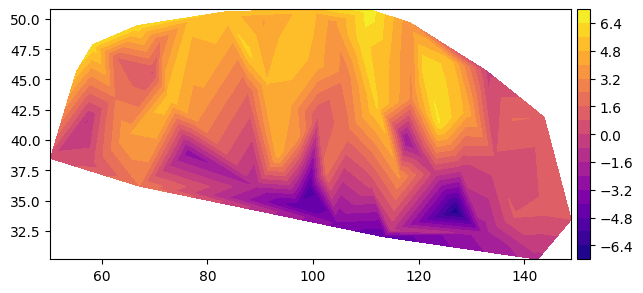

In [ ]:
    # Initialize figure
fig, ax = plt.subplots(1, figsize=(8, 3.25))

    # Contourf plot
cfset = ax.tricontourf(plot_centroids[:,2], plot_centroids[:,1], smoothened_values, 20,
                           cmap='plasma')

cbar = plt.colorbar(cfset, ax=ax, pad=0.01)